In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import os
import seaborn as sns
import matplotlib.colors as mcolors

from tabulate import tabulate
from scipy.stats import pearsonr, spearmanr, zscore

pd.set_option("display.width", 80)
pd.set_option("display.max_colwidth", None)

In [15]:
# 1. load all data files and pair them as a corpus
data_files = os.listdir("data")
reward_df_files = sorted(
    [f for f in data_files if "scoredreward_humanassistant_includeprompt" in f]
)
nll_df_files = sorted(
    [f for f in data_files if "scorednll" in f and "includeprompt" not in f]
)
correction_files = sorted([f for f in data_files if "scoredcorrectionnll" in f])

triplet_files = [
    (r, n, c) for r, n, c in zip(reward_df_files, nll_df_files, correction_files)
]
assert len(reward_df_files) == len(nll_df_files) == len(correction_files)

for r, n, c in triplet_files:
    print()
    print(r)
    print(n)
    print(c)


ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.0_humanassistant_scoredreward_humanassistant_includeprompt.csv
ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.0_humanassistant_scorednll.csv
ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.0_humanassistant_scoredcorrectionnll_ancestral_1.0_humanassistant_includeprompt_conditioned.csv

ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.5_humanassistant_scoredreward_humanassistant_includeprompt.csv
ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.5_humanassistant_scorednll.csv
ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.5_humanassistant_scoredcorrectionnll_ancestral_1.5_humanassistant_includeprompt_conditioned.csv

ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_

In [3]:
# 2. set parameters
num_corpuses = 5000
num_samples_per_corpus = 5000

colours = (
    list(mcolors.TABLEAU_COLORS.keys())
    + list(mcolors.BASE_COLORS.keys())
    + list(mcolors.CSS4_COLORS.keys())
)
names = [
    "k50_t1.0",
    "k50_t1.5",
    "k50_t2.0",
    "eta_n00009_t1.0",
    "eta_n00009_t1.5",
    "eta_n00009_t2.0",
    "top_k30_t1.0",
    "top_k30_t1.5",
    "top_k30_t2.0",
    "p090_t1.0",
    "p090_t1.5",
    "p090_t2.0",
    "p095_t1.0",
    "p095_t1.5",
    "p095_t2.0",
    "typical_p090_t1.0",
    "typical_p090_t1.5",
    "typical_p090_t2.0",
]
assert len(colours) >= len(triplet_files)
assert len(names) == len(triplet_files)



Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.0_humanassistant_scorednll.csv:
Length: 1943
+----+------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.28322304722304725, pvalue=6.678797031427788e-20)
Pearson: PearsonRResult(statistic=0.30803849833810565, pvalue=2.0143714912546565e-23)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=0.3922319602319603, pvalue=4.014631564509845e-38)
Pearson: PearsonRResult(statistic=0.39570160085251255, pvalue=7.916909008782485e-39)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.999455930359086
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.29978902778902783, pvalue=3.257958793094693e-22)
Pearson: PearsonRResult(statistic=0.3038929668122332, pvalue=8.249757116431347e-23)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.5_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t1.5_humanassistant_score

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.23244875244875243, pvalue=9.792450904485823e-14)
Pearson: PearsonRResult(statistic=0.23721674192594702, pvalue=2.942677472367773e-14)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.650968706968707, pvalue=1.3462259953536056e-121)
Pearson: PearsonRResult(statistic=-0.6540645935671695, pvalue=4.0018308748539577e-123)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9993169398907104
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.25996104796104796, pvalue=6.573498829029528e-17)
Pearson: PearsonRResult(statistic=0.29587542464694133, pvalue=1.1827904873152758e-21)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t2.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_ancestral_t2.0_humanassistant

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


Spearman: SignificanceResult(statistic=0.2206822966822967, pvalue=1.7008670153959257e-12)
Pearson: PearsonRResult(statistic=0.22703639295989944, pvalue=3.7131752400966237e-13)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.7996072636072638, pvalue=2.9644319079793937e-223)
Pearson: PearsonRResult(statistic=-0.8178016719224804, pvalue=1.0345590401765935e-241)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9990272373540856
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.27034565434565433, pvalue=3.292332642205362e-18)
Pearson: PearsonRResult(statistic=0.2767102013287312, pvalue=4.921319950668754e-19)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_eta_n00009_t1.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_eta_n00009_t1.0_humanassistant_scorednll.csv:
Length: 1939
+----

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.3281118161118161, pvalue=1.5776342367101866e-26)
Pearson: PearsonRResult(statistic=0.33531083468134, pvalue=1.0610609720406675e-27)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=0.5155125955125957, pvalue=5.546429144084708e-69)
Pearson: PearsonRResult(statistic=0.525829736971735, pvalue=3.475728440539502e-72)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9994232987312572
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.3132836412836413, pvalue=3.2753153491760016e-24)
Pearson: PearsonRResult(statistic=0.3086834439319596, pvalue=1.6143359820747364e-23)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_eta_n00009_t1.5_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_eta_n00009_t1.5_humanassistant_scored

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.19629768429768432, pvalue=3.8319907032233897e-10)
Pearson: PearsonRResult(statistic=0.1974695533625389, pvalue=2.998646674751927e-10)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.5378232338232339, pvalue=4.7436760644226326e-76)
Pearson: PearsonRResult(statistic=-0.5520024107428487, pvalue=7.965367178410381e-81)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9994162288382954
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.1818763338763339, pvalue=6.929705074822931e-09)
Pearson: PearsonRResult(statistic=0.1853545374303755, pvalue=3.5192525468063407e-09)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_eta_n00009_t2.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_eta_n00009_t2.0_humanassistant_s

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.28531049731049735, pvalue=3.481622112789701e-20)
Pearson: PearsonRResult(statistic=0.31447801735123115, pvalue=2.1546997125817075e-24)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.4829279429279429, pvalue=1.471820889752347e-59)
Pearson: PearsonRResult(statistic=-0.5035434266331523, pvalue=2.1114625856722893e-65)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9994490358126722
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.3654085134085135, pvalue=5.989359340272226e-33)
Pearson: PearsonRResult(statistic=0.37400654926161697, pvalue=1.4842043652913151e-34)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_k30_t1.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_k30_t1.0_humanassistant_score

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.28883170883170883, pvalue=1.1457862201361835e-20)
Pearson: PearsonRResult(statistic=0.30886470122545967, pvalue=1.5168051583815886e-23)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=0.23006555006555005, pvalue=1.768418830298851e-13)
Pearson: PearsonRResult(statistic=0.23023667229448508, pvalue=1.6953081631628788e-13)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9994152046783625
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.31549190749190753, pvalue=1.5078247000660238e-24)
Pearson: PearsonRResult(statistic=0.33033718889837455, pvalue=6.901939628916667e-27)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_k30_t1.5_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_k30_t1.5_humanassistant_sco

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.22426454026454032, pvalue=7.253165898319221e-13)
Pearson: PearsonRResult(statistic=0.23519661963921507, pvalue=4.9132763894794703e-14)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.7683310203310204, pvalue=1.3173798208392975e-195)
Pearson: PearsonRResult(statistic=-0.7803721251767026, pvalue=1.0389872864385327e-205)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.999247554552295
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.29237418437418433, pvalue=3.6861932209467484e-21)
Pearson: PearsonRResult(statistic=0.307556024047843, pvalue=2.3763385327516888e-23)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_k30_t2.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_k30_t2.0_humanassistant_sco

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


Spearman: SignificanceResult(statistic=0.21159807159807162, pvalue=1.3834267360011739e-11)
Pearson: PearsonRResult(statistic=0.21330361679445933, pvalue=9.40019345953804e-12)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.673977181977182, pvalue=2.162063507060871e-133)
Pearson: PearsonRResult(statistic=-0.6857450312887756, pvalue=7.560701271555951e-140)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9989429175475687
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.2320660600660601, pvalue=1.0772175198983439e-13)
Pearson: PearsonRResult(statistic=0.23029020328266722, pvalue=1.6730524787123161e-13)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p090_t1.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p090_t1.0_humanassistant_scorednll.csv:
Length: 1905
+----+-----

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


Spearman: SignificanceResult(statistic=0.37290148890148894, pvalue=2.402265453687478e-34)
Pearson: PearsonRResult(statistic=0.40698870108860374, pvalue=3.515266895375113e-41)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.6466658626658627, pvalue=1.6662235954836262e-119)
Pearson: PearsonRResult(statistic=-0.6697447701188327, pvalue=3.8390380265130604e-131)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9990147783251232
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.40433309633309633, pvalue=1.2813254227623119e-40)
Pearson: PearsonRResult(statistic=0.4312321617900036, pvalue=1.5051774227786283e-46)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p090_t1.5_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p090_t1.5_humanassistant_scorednll.csv:
Length: 1986
+----+--

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.29304652104652107, pvalue=2.966957721575684e-21)
Pearson: PearsonRResult(statistic=0.29992299680156864, pvalue=3.116191595095474e-22)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.4665234225234226, pvalue=3.472328390582855e-55)
Pearson: PearsonRResult(statistic=-0.5008515719035802, pvalue=1.289520188455641e-64)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9993315508021391
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.2237619317619318, pvalue=8.181717985930962e-13)
Pearson: PearsonRResult(statistic=0.2326216979909387, pvalue=9.378910635529987e-14)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p090_t2.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p090_t2.0_humanassistant_scoredn

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.3153555273555274, pvalue=1.5821217432758424e-24)
Pearson: PearsonRResult(statistic=0.33343874536347456, pvalue=2.1557554772578703e-27)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.47583631983631985, pvalue=1.2229012707634662e-57)
Pearson: PearsonRResult(statistic=-0.48341003559899687, pvalue=1.0857238385358575e-59)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9994866529774127
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.2590688710688711, pvalue=8.449814978766318e-17)
Pearson: PearsonRResult(statistic=0.26199279742662845, pvalue=3.697361565705085e-17)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p095_t1.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p095_t1.0_humanassistant_s

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


Spearman: SignificanceResult(statistic=0.3977109137109137, pvalue=3.064570604208931e-39)
Pearson: PearsonRResult(statistic=0.41612526062081456, pvalue=3.751880787097233e-43)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.3462698742698743, pvalue=1.515313658073718e-29)
Pearson: PearsonRResult(statistic=-0.353950039413495, pvalue=6.963793213320974e-31)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9992301770592764
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.4456076896076896, pvalue=6.046915346037354e-50)
Pearson: PearsonRResult(statistic=0.46668987426023617, pvalue=3.1436568387560898e-55)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p095_t1.5_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p095_t1.5_humanassistant_scorednll.csv:
Length: 1982
+----+---------

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.22410735210735214, pvalue=7.531872005581075e-13)
Pearson: PearsonRResult(statistic=0.22401477233618575, pvalue=7.700906096888899e-13)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.40910319710319715, pvalue=1.2446994576717387e-41)
Pearson: PearsonRResult(statistic=-0.42201146676044277, pvalue=1.8676616014501148e-44)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9994134897360704
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.2696989136989137, pvalue=3.982547145021226e-18)
Pearson: PearsonRResult(statistic=0.2786892516201772, pvalue=2.6974577318247204e-19)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p095_t2.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_top_p095_t2.0_humanassistant_sc

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.2660338700338701, pvalue=1.1597200268473579e-17)
Pearson: PearsonRResult(statistic=0.28029656558311034, pvalue=1.649337268059876e-19)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.587907935907936, pvalue=5.322355781179063e-94)
Pearson: PearsonRResult(statistic=-0.6064953457808595, pvalue=1.708199199232576e-101)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9994934143870314
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.2683973203973204, pvalue=5.8322176704286804e-18)
Pearson: PearsonRResult(statistic=0.28044312030346696, pvalue=1.5767371061712914e-19)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_typical_p090_t1.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_typical_p090_t1.0_humanassist

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


Spearman: SignificanceResult(statistic=0.4857894537894539, pvalue=2.4013215185522347e-60)
Pearson: PearsonRResult(statistic=0.48855986364226556, pvalue=4.0829004148061535e-61)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.719973155973156, pvalue=1.6691412362834915e-160)
Pearson: PearsonRResult(statistic=-0.7326349436173972, pvalue=5.984806358500837e-169)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9990393852065321
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.4230326550326551, pvalue=1.1030768264127831e-44)
Pearson: PearsonRResult(statistic=0.43458638538693295, pvalue=2.5103518485750473e-47)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_typical_p090_t1.5_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_typical_p090_t1.5_humanassistant_scorednll.csv:
Length: 1975
+

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.25222231222231223, pvalue=5.621154075204995e-16)
Pearson: PearsonRResult(statistic=0.2616825651876196, pvalue=4.038231860888362e-17)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.4288626088626089, pvalue=5.27039455142454e-46)
Pearson: PearsonRResult(statistic=-0.4406680612807647, pvalue=9.266390004913838e-49)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9993201903467029
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.2859100967678271, pvalue=2.884520125904471e-20)
Pearson: PearsonRResult(statistic=0.3086048877762531, pvalue=1.6585078547180327e-23)


Analyzing ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_typical_p090_t2.0_humanassistant_scoredreward_humanassistant_includeprompt.csv and ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt1000_numgenerations2_typical_p090_t2.0_humanassistant_

/tmp/ipykernel_523862/264844001.py:43: RuntimeWarning: overflow encountered in exp
  np.exp(


Spearman: SignificanceResult(statistic=0.2456884856884857, pvalue=3.254606937379217e-15)
Pearson: PearsonRResult(statistic=0.267678419635952, pvalue=7.193674124280089e-18)
===== Corrected corpus level statistics =====
Spearman: SignificanceResult(statistic=-0.5393122913122914, pvalue=1.5322197807607655e-76)
Pearson: PearsonRResult(statistic=-0.5547747077204961, pvalue=8.721237217589693e-82)
===== Metropolis corpus level statistics =====
Algorithm acceptance rate: 0.9992181391712275
Acceptance rate: 1.0
Spearman: SignificanceResult(statistic=0.24021174021174024, pvalue=1.3641669301554624e-14)
Pearson: PearsonRResult(statistic=0.2373804347845403, pvalue=2.82235914127092e-14)
===== Total corpus level statistics =====
Spearman: SignificanceResult(statistic=0.3322483424341868, pvalue=0.0)
Pearson: PearsonRResult(statistic=0.21589111138232164, pvalue=3.584247221496492e-280)
===== Total corpus mean statistics =====
Spearman: SignificanceResult(statistic=-0.4352835773084885, pvalue=0.0)
Pearso

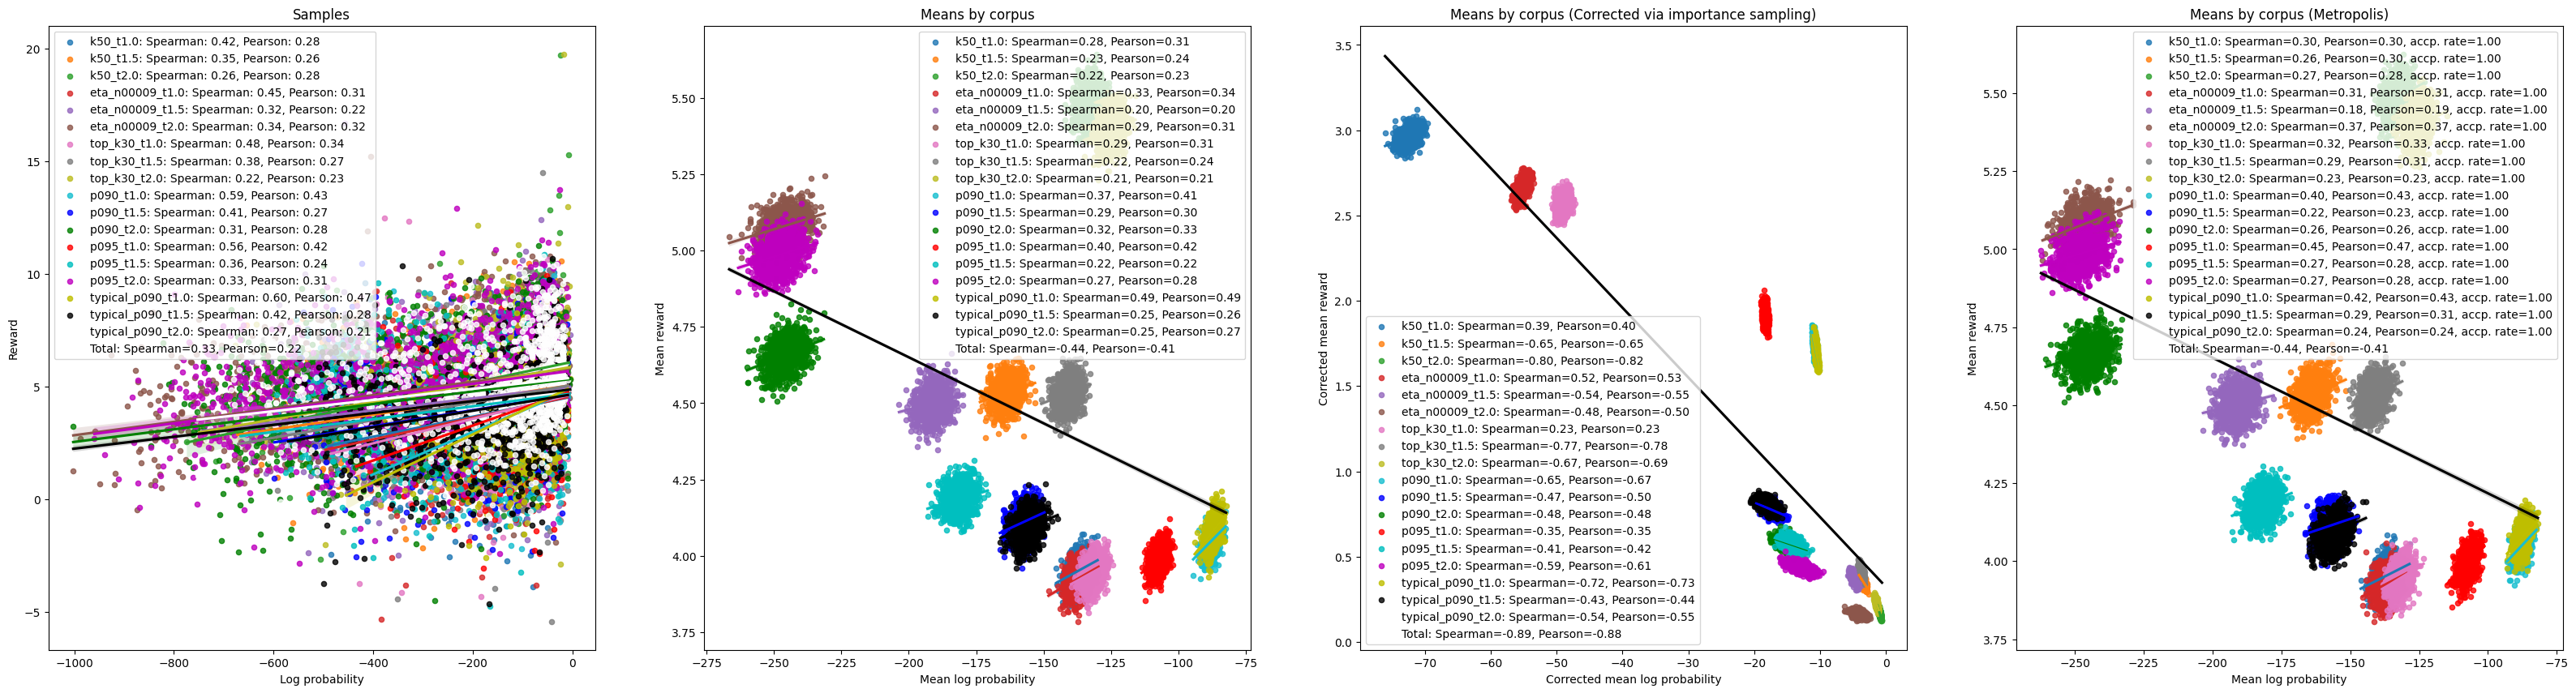

In [13]:
# 3. analysis on each corpus
# 3.0 a single output figure
fig, axs = plt.subplots(1, 4, figsize=(40, 10))
total_mean_corpuses = None
total_corpus = None
total_mean_corrected_corpuses = None
total_mean_metropolis_corpuses = None
acceptance_rates = dict()
for idx, (reward_df_file, nll_df_file, correction_df_file) in enumerate(triplet_files):
    print(f"\n\nAnalyzing {reward_df_file} and {nll_df_file}:")
    # 3.1 load and merge
    reward_df = pd.read_csv(f"data/{reward_df_file}")
    nll_df = pd.read_csv(f"data/{nll_df_file}")
    correction_df = pd.read_csv(f"data/{correction_df_file}")
    df = reward_df.merge(nll_df, on=["prompt", "generated_text"]).merge(
        correction_df, on=["prompt", "generated_text"], how="inner"
    )

    # 3.1.1 get log probability
    df["log_probability"] = -df["negative_log_probability"]

    # 3.1.2 filter duplicates, empty strings, invalid probabilities
    df = df[
        df.apply(lambda row: len(row["generated_text"]) > 0, axis=1)
    ].drop_duplicates()
    df = df[df["negative_log_probability"].isin([-np.inf, np.inf]) == False]
    df = df[df["negative_log_probability"].isnull() == False]
    df = df[df["score"].isin([-np.inf, np.inf]) == False]
    df = df[df["score"].isnull() == False]

    assert len(df) > 0
    print(f"Length: {len(df)}")
    print(tabulate(df.head(), headers="keys", tablefmt="psql"))
    print(
        tabulate(
            df[["score", "log_probability"]].describe(), headers="keys", tablefmt="psql"
        )
    )

    # 3.1.3 compute correction ratio
    df["correction_ratio"] = df.apply(
        lambda row: (
            np.exp(
                np.array(
                    -row["original_negative_log_probability"]
                    + row["samplingbiased_negative_log_probability"]
                )
            )
        ),
        axis=1,
    )
    df = df[
        df["correction_ratio"].apply(
            lambda x: False if (np.isinf(x) or np.isnan(x)) else True
        )
    ]
    # df = df[(np.abs(zscore(df[["correction_ratio"]])) < 1.5).all(axis=1)]
    df["corrected_score"] = df.apply(
        lambda row: row["score"] * row["correction_ratio"], axis=1
    )
    df["corrected_log_probability"] = df.apply(
        lambda row: row["log_probability"] * row["correction_ratio"],
        axis=1,
    )

    # 3.2 Sample level
    print("===== Sample level statistics =====")
    # 3.2.1 Scatter
    spearman = spearmanr(df["score"], df["log_probability"])
    pearson = pearsonr(df["score"], df["log_probability"])
    print(f"Spearman: {spearman}")
    print(f"Pearson: {pearson}")
    df.plot.scatter(
        y="score",
        x="log_probability",
        title="Samples",
        ax=axs[0],
        c=colours[idx],
        alpha=0.8,
        label=f"{names[idx]}: Spearman: {spearman[0]:.2f}, Pearson: {pearson[0]:.2f}",
    )
    # 3.2.2 best fit line
    sns.regplot(
        y="score",
        x="log_probability",
        data=df,
        ax=axs[0],
        scatter=False,
        color=colours[idx],
    )
    if total_corpus is None:
        total_corpus = df
    else:
        total_corpus = pd.concat([total_corpus, df])

    # 3.3 Corpus level
    print("===== Corpus level statistics =====")
    # 3.3.1 Sample corpuses
    corpuses = {
        corpus_seed: df.sample(
            num_samples_per_corpus, random_state=corpus_seed, replace=True
        )
        for corpus_seed in range(num_corpuses)
    }
    mean_corpuses_df = pd.DataFrame.from_dict(
        {
            corpus_seed: corpus[["score", "log_probability"]].mean(axis=0)
            for corpus_seed, corpus in corpuses.items()
        }
    ).T
    spearman = spearmanr(mean_corpuses_df["score"], mean_corpuses_df["log_probability"])
    pearson = pearsonr(mean_corpuses_df["score"], mean_corpuses_df["log_probability"])
    print(f"Spearman: {spearman}")
    print(f"Pearson: {pearson}")
    mean_corpuses_df.plot.scatter(
        y="score",
        x="log_probability",
        title="Means by corpus",
        ax=axs[1],
        c=colours[idx],
        alpha=0.8,
        label=f"{names[idx]}: Spearman={spearman[0]:.2f}, Pearson={pearson[0]:.2f}",
    )
    if total_mean_corpuses is None:
        total_mean_corpuses = mean_corpuses_df
    else:
        total_mean_corpuses = pd.concat([total_mean_corpuses, mean_corpuses_df])

    # 3.3.2 best fit line
    sns.regplot(
        y="score",
        x="log_probability",
        data=mean_corpuses_df,
        ax=axs[1],
        scatter=False,
        color=colours[idx],
    )

    # 3.4 corrected corpus level
    print("===== Corrected corpus level statistics =====")
    # 3.4.1 Sample corpuses
    importance_df = df[
        df["original_negative_log_probability"]
        > df["samplingbiased_negative_log_probability"]
    ]
    corpuses = {
        corpus_seed: importance_df.sample(
            num_samples_per_corpus, random_state=corpus_seed, replace=True
        )
        for corpus_seed in range(num_corpuses)
    }
    mean_corpuses_df = pd.DataFrame.from_dict(
        {
            corpus_seed: corpus[["corrected_score", "corrected_log_probability"]].mean(
                axis=0
            )
            for corpus_seed, corpus in corpuses.items()
        }
    ).T
    spearman = spearmanr(
        mean_corpuses_df["corrected_score"],
        mean_corpuses_df["corrected_log_probability"],
    )
    pearson = pearsonr(
        mean_corpuses_df["corrected_score"],
        mean_corpuses_df["corrected_log_probability"],
    )
    print(f"Spearman: {spearman}")
    print(f"Pearson: {pearson}")
    mean_corpuses_df.plot.scatter(
        y="corrected_score",
        x="corrected_log_probability",
        title="Means by corpus (Corrected via importance sampling)",
        ax=axs[2],
        c=colours[idx],
        alpha=0.8,
        label=f"{names[idx]}: Spearman={spearman[0]:.2f}, Pearson={pearson[0]:.2f}",
    )
    if total_mean_corrected_corpuses is None:
        total_mean_corrected_corpuses = mean_corpuses_df
    else:
        total_mean_corrected_corpuses = pd.concat(
            [total_mean_corrected_corpuses, mean_corpuses_df]
        )

    # 3.4.2 best fit line
    sns.regplot(
        y="corrected_score",
        x="corrected_log_probability",
        data=mean_corpuses_df,
        ax=axs[2],
        scatter=False,
        color=colours[idx],
    )

    # 3.5 metropolis corpus level
    print("===== Metropolis corpus level statistics =====")
    # 3.5.0 metropolis
    metropolis_df = None
    acceptance_thresholds = np.random.uniform(0.0, 1.0, size=len(df))
    acceptances = dict()
    acceptance_count = 0
    prev = df.iloc[0]
    for step in range(1, len(df)):
        sample = df.iloc[step]
        acceptance = (
            min(
                1.0,
                (
                    np.exp(
                        np.array(
                            -sample["original_negative_log_probability"]
                            - prev["samplingbiased_negative_log_probability"]
                            + prev["original_negative_log_probability"]
                            + sample["samplingbiased_negative_log_probability"]
                        ).astype(np.float128)
                    ).item()
                ),
            )
            > acceptance_thresholds[step - 1],
        )
        if acceptance:
            acceptance_count += 1
            prev = sample
            acceptances[(sample["prompt"], sample["generated_text"])] = True
            to_add = df[
                (df["prompt"] == sample["prompt"])
                & (df["generated_text"] == sample["generated_text"])
            ]
        else:
            acceptances[(prev["prompt"], prev["generated_text"])] = True
            to_add = df[
                (df["prompt"] == prev["prompt"])
                & (df["generated_text"] == prev["generated_text"])
            ]
        if metropolis_df is None:
            metropolis_df = to_add
        else:
            metropolis_df = pd.concat([metropolis_df, to_add])
    acceptance_rate = np.mean(list(acceptances.values()))
    algorithm_acceptance_rate = acceptance_count / len(df)
    print(f"Algorithm acceptance rate: {algorithm_acceptance_rate}")
    print(f"Acceptance rate: {acceptance_rate}")
    df["acceptance"] = df.apply(
        lambda row: acceptances.get((row["prompt"], row["generated_text"]), False),
        axis=1,
    )

    # 3.5.1 Sample corpuses
    corpuses = {
        corpus_seed: metropolis_df.sample(
            num_samples_per_corpus, random_state=corpus_seed, replace=True
        )
        for corpus_seed in range(num_corpuses)
    }
    mean_corpuses_df = pd.DataFrame.from_dict(
        {
            corpus_seed: corpus[["score", "log_probability"]].mean(axis=0)
            for corpus_seed, corpus in corpuses.items()
        }
    ).T

    spearman = spearmanr(
        mean_corpuses_df["score"],
        mean_corpuses_df["log_probability"],
    )
    pearson = pearsonr(
        mean_corpuses_df["score"],
        mean_corpuses_df["log_probability"],
    )
    print(f"Spearman: {spearman}")
    print(f"Pearson: {pearson}")
    mean_corpuses_df.plot.scatter(
        y="score",
        x="log_probability",
        title="Means by corpus (Metropolis)",
        ax=axs[3],
        c=colours[idx],
        alpha=0.8,
        label=(
            f"{names[idx]}: Spearman={spearman[0]:.2f}, Pearson={pearson[0]:.2f}, accp."
            f" rate={algorithm_acceptance_rate:.2f}"
        ),
    )

    # 3.5.2 best fit line
    sns.regplot(
        y="score",
        x="log_probability",
        data=mean_corpuses_df,
        ax=axs[3],
        scatter=False,
        color=colours[idx],
    )

    if total_mean_metropolis_corpuses is None:
        total_mean_metropolis_corpuses = mean_corpuses_df
    else:
        total_mean_metropolis_corpuses = pd.concat(
            [total_mean_metropolis_corpuses, mean_corpuses_df]
        )

# 4. Total corpus level statistics
# 4.1 sample
print("===== Total corpus level statistics =====")
spearman = spearmanr(total_corpus["score"], total_corpus["log_probability"])
pearson = pearsonr(total_corpus["score"], total_corpus["log_probability"])
print(f"Spearman: {spearman}")
print(f"Pearson: {pearson}")
total_corpus.plot.scatter(
    y="score",
    x="log_probability",
    alpha=0.0,
    label=f"Total: Spearman={spearman[0]:.2f}, Pearson={pearson[0]:.2f}",
    ax=axs[0],
)
sns.regplot(
    y="score",
    x="log_probability",
    data=total_corpus,
    scatter=False,
    color="black",
    ax=axs[0],
)
axs[0].set_ylabel("Reward")
axs[0].set_xlabel("Log probability")

# 4.2 corpus
print("===== Total corpus mean statistics =====")
spearman = spearmanr(
    total_mean_corpuses["score"], total_mean_corpuses["log_probability"]
)
pearson = pearsonr(total_mean_corpuses["score"], total_mean_corpuses["log_probability"])
print(f"Spearman: {spearman}")
print(f"Pearson: {pearson}")
total_mean_corpuses.plot.scatter(
    y="score",
    x="log_probability",
    title="Means by corpus",
    alpha=0.0,
    label=f"Total: Spearman={spearman[0]:.2f}, Pearson={pearson[0]:.2f}",
    ax=axs[1],
    ylabel="Mean score",
    xlabel="Mean log probability",
)

sns.regplot(
    y="score",
    x="log_probability",
    data=total_mean_corpuses,
    scatter=False,
    color="black",
    ax=axs[1],
)
axs[1].set_ylabel("Mean reward")
axs[1].set_xlabel("Mean log probability")

# 4.3 corrected corpus
print("===== Total corrected corpus mean statistics =====")
spearman = spearmanr(
    total_mean_corrected_corpuses["corrected_score"],
    total_mean_corrected_corpuses["corrected_log_probability"],
)
pearson = pearsonr(
    total_mean_corrected_corpuses["corrected_score"],
    total_mean_corrected_corpuses["corrected_log_probability"],
)
print(f"Spearman: {spearman}")
print(f"Pearson: {pearson}")
total_mean_corrected_corpuses.plot.scatter(
    y="corrected_score",
    x="corrected_log_probability",
    title="Means by corpus (Corrected via importance sampling)",
    alpha=0.0,
    label=f"Total: Spearman={spearman[0]:.2f}, Pearson={pearson[0]:.2f}",
    ax=axs[2],
    ylabel="Corrected mean score",
    xlabel="Corrected mean log probability",
)
sns.regplot(
    y="corrected_score",
    x="corrected_log_probability",
    data=total_mean_corrected_corpuses,
    scatter=False,
    color="black",
    ax=axs[2],
)
axs[2].set_ylabel("Corrected mean reward")
axs[2].set_xlabel("Corrected mean log probability")

# 4.4 corrected metropolis corpus
print("===== Total metropolis corpus mean statistics =====")
spearman = spearmanr(
    total_mean_metropolis_corpuses["score"],
    total_mean_metropolis_corpuses["log_probability"],
)
pearson = pearsonr(
    total_mean_metropolis_corpuses["score"],
    total_mean_metropolis_corpuses["log_probability"],
)
print(f"Spearman: {spearman}")
print(f"Pearson: {pearson}")
total_mean_metropolis_corpuses.plot.scatter(
    y="score",
    x="log_probability",
    title="Means by corpus (Metropolis)",
    alpha=0.0,
    label=f"Total: Spearman={spearman[0]:.2f}, Pearson={pearson[0]:.2f}",
    ax=axs[3],
    ylabel="Mean reward",
    xlabel="Mean log probability",
)
sns.regplot(
    y="score",
    x="log_probability",
    data=total_mean_metropolis_corpuses,
    scatter=False,
    color="black",
    ax=axs[3],
)
axs[3].set_ylabel("Mean reward")
axs[3].set_xlabel("Mean log probability")

plt.legend()
plt.show()
plt.close()